In [1]:
import seaborn as sns
from copy import deepcopy
import pandas as pd
from tqdm import tqdm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from itertools import product
from modules import downcast_dtypes, get_split_points, get_train_val, \
                    add_shop_last_stat, add_item_last_stat, fit_and_eval, fill_with_0_target

In [3]:
all_data = fill_with_0_target(downcast_dtypes(pd.read_csv('sales_train.csv')))

In [4]:
all_data['target'] = all_data['target'].clip(0., 20.)
all_data = add_item_last_stat(all_data)
all_data = add_shop_last_stat(all_data)

In [5]:
all_data['is_new_item'] = all_data.prev_item_sales.isna().astype(int)

In [6]:
all_data['month'] = all_data['date_block_num'] % 12

In [13]:
all_data

,shop_id,item_id,date_block_num,target,prev_item_sales,prev_shop_sales,is_new_item,month
0,0,19,0,0.0,NaN,NaN,1,0
1,0,27,0,0.0,NaN,NaN,1,0
2,0,28,0,0.0,NaN,NaN,1,0
3,0,29,0,0.0,NaN,NaN,1,0
4,0,32,0,6.0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...
10913845,59,22162,33,0.0,7.0,914.0,0,9
10913846,59,22163,33,0.0,20.0,914.0,0,9
10913847,59,22164,33,0.0,9.0,914.0,0,9
10913848,59,22166,33,0.0,5.0,914.0,0,9


In [7]:
train_exp_on_prev = all_data.fillna(0.).loc[(all_data['date_block_num'] > 0) & (all_data['date_block_num'] < 34)]

In [6]:
print('new column is new item & clipped in the beginning & new preds on new items')
model =  fit_and_eval(train_exp_on_prev, algo='cbr')

new column is new item & clipped in the beginning & new preds on new items
Model:  cbr
feat importancies:  [63.80836652 36.19163348]
rmse on val:  [0.8948821979244631, 0.8438046966904319, 0.914010189369227, 1.0094828767568076, 1.021757413476581]


In [7]:
all_data['is_new_item'] = all_data.prev_item_sales.isna().astype(int)
train_exp_on_prev = all_data.fillna(0.).loc[(all_data['date_block_num'] > 0) & (all_data['date_block_num'] < 34)]
print('new column is new item & clipped in the beginning & new preds on new items')
model =  fit_and_eval(train_exp_on_prev, algo='cbr')

new column is new item & clipped in the beginning & new preds on new items
Model:  cbr
feat importancies:  [63.61033711 35.61791032  0.77175257]
rmse on val:  [0.8946835462558848, 0.8449663860569778, 0.9150848322922248, 1.0097987159328803, 1.0224870404422972]


In [6]:
all_data['is_new_item'] = all_data.prev_item_sales.isna().astype(int)
train_exp_on_prev = all_data.fillna(0.).loc[(all_data['date_block_num'] > 0) & (all_data['date_block_num'] < 34)]
print('без добавления сдвига')
model =  fit_and_eval(train_exp_on_prev, algo='cbr')

без добавления сдвига
Model:  cbr
feat importancies:  [63.61033711 35.61791032  0.77175257]
rmse on val:  [0.8982538195209541, 0.8453305235080384, 0.9169218184580411, 1.0157715914341514, 1.0264247548524104]


In [7]:
print('поиск лучшей итерации')
model =  fit_and_eval(train_exp_on_prev, algo='cbr')

поиск лучшей итерации
Model:  cbr
feat importancies:  [63.61033711 35.61791032  0.77175257]
rmse on val:  [0.8946835462558848, 0.8449663860569778, 0.9150848322922248, 1.0097987159328803, 1.0224870404422972]
best iterations:  [42, 23, 19, 31, 23]


In [7]:
print('early_stopping_rounds=15 instead of 5')
model =  fit_and_eval(train_exp_on_prev, algo='cbr')

early_stopping_rounds=15 instead of 5
Model:  cbr
feat importancies:  [63.13020066 36.0973458   0.77245354]
rmse on val:  [0.8941171319673156, 0.8449663860569778, 0.9129942460401448, 1.0076599251285696, 1.0212269073484361]
best iterations:  [54, 23, 90, 169, 53]


In [7]:
print('early_stopping_rounds=20')
model =  fit_and_eval(train_exp_on_prev, algo='cbr',early_stopping_rounds=20)

early_stopping_rounds=20
Model:  cbr
feat importancies:  [63.13020066 36.0973458   0.77245354]
rmse on val:  [0.8941171319673156, 0.8449663860569778, 0.9125872402509089, 1.0071741666327425, 1.0212269073484361]
best iterations:  [54, 23, 116, 260, 53]


In [8]:
print('early_stopping_rounds=25')
model =  fit_and_eval(train_exp_on_prev, algo='cbr',early_stopping_rounds=25)

early_stopping_rounds=25
Model:  cbr
feat importancies:  [63.13020066 36.0973458   0.77245354]
rmse on val:  [0.8941171319673156, 0.8449663860569778, 0.9123446653199095, 1.0071741666327425, 1.0212269073484361]
best iterations:  [54, 23, 154, 260, 53]


In [9]:
print('early_stopping_rounds=30')
model =  fit_and_eval(train_exp_on_prev, algo='cbr',early_stopping_rounds=30)

early_stopping_rounds=30
Model:  cbr
feat importancies:  [63.13020066 36.0973458   0.77245354]
rmse on val:  [0.8941171319673156, 0.8449663860569778, 0.9123446653199095, 1.0071741666327425, 1.0212269073484361]
best iterations:  [54, 23, 154, 260, 53]


In [15]:
print('new columnt month number')
model =  fit_and_eval(train_exp_on_prev, algo='cbr',early_stopping_rounds=5)

new columnt month number
Model:  cbr
feat importancies:  [60.09307402 32.15906557  0.4225892   7.32527122]
rmse on val:  [0.8795152087449202, 0.8290601462252336, 0.8977896626912084, 1.0048685220782843, 1.0196910351788655]
best iterations:  [38, 27, 38, 13, 18]


In [13]:
def get_new_val(val, extra_items, extra_idces):
    if len(extra_idces) / len(val) < 0.071:
        new_n_old_objects = int(len(extra_idces) / 0.071 - len(extra_idces))
        new_val = val.loc[~val['item_id'].isin(extra_items)]
        drop_indices = np.random.choice(new_val.index, len(new_val) - new_n_old_objects, replace=False)
        new_val = val.drop(drop_indices)
    else:
        n_old_objects = len(val.loc[~val['item_id'].isin(extra_items)])
        new_n_new_objects = int(n_old_objects * 0.071 / (1 - 0.071 ))
        new_val = val.loc[val['item_id'].isin(extra_items)]
        drop_indices = np.random.choice(new_val.index, len(new_val) - new_n_new_objects, replace=False)
        new_val = val.drop(drop_indices)
    return new_val

In [8]:
print('одинаковая доля новых объектов в val')
model =  fit_and_eval(train_exp_on_prev, algo='cbr',early_stopping_rounds=5)

одинаковая доля новых объектов в val


IndexError: index 151445 is out of bounds for axis 0 with size 151408

In [22]:
np.random.seed(0)

In [26]:
from sklearn.metrics import mean_squared_error as mse
from catboost import CatBoostRegressor

data = train_exp_on_prev
train_split_points, val_split_points = get_split_points(data)

algo = 'cbr'
early_stopping_rounds=1
val_results = []
best_iterations = []
vals = []
for train, val in get_train_val(data, train_split_points, val_split_points):
    extra_items = set(val.item_id) - set(train.item_id)
    extra_idces = val.loc[val['item_id'].isin(extra_items)].index - val.index.min()
    val = get_new_val(val, extra_items, extra_idces).reset_index(drop=True)
    vals.append(val)
    X_train = np.array(train.drop(['date_block_num', 'target', 'item_id', 'shop_id'], axis=1))
    X_val = np.array(val.drop(['date_block_num', 'target', 'item_id', 'shop_id'], axis=1))
    y_train, y_val = np.array(train['target']), np.array(val['target'])
    if algo == 'rfr':
        model = RandomForestRegressor(n_estimators=64, n_jobs=-1)
        model.fit(X_train, y_train)
    else:
        model = CatBoostRegressor()
        model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=early_stopping_rounds, silent=True)
    preds = model.predict(X_val)
    extra_idces = val.loc[val['item_id'].isin(extra_items)].index - val.index.min()
    preds[extra_idces] += 0.3
    val_results.append(mse(preds, y_val, squared=False))
    best_iterations.append(model.best_iteration_)
    print(preds[extra_idces].mean(), val.loc[extra_idces].target.mean())
print(val_results)

0.4459120998892614 0.53506976
0.4585890309292959 0.33630615
0.44808533731706396 0.4061128
0.463247279986679 0.6572463
0.46264647822340216 0.45475358
[0.9313986660215645, 0.8647027127711335, 0.9199422921270752, 1.042906445496812, 0.9905305770985784]


In [41]:
mse(model.predict(X_train), y_train, squared=False)

1.0035634997870535

In [42]:
new_X = model.predict(X_train)

In [44]:
np.where(y_val == 1.)[0]

array([     1,    160,    163, ..., 233763, 233765, 233767])

In [ ]:
model = CatBoostRegressor()
model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=early_stopping_rounds, silent=True)

(0.0, 3000.0)

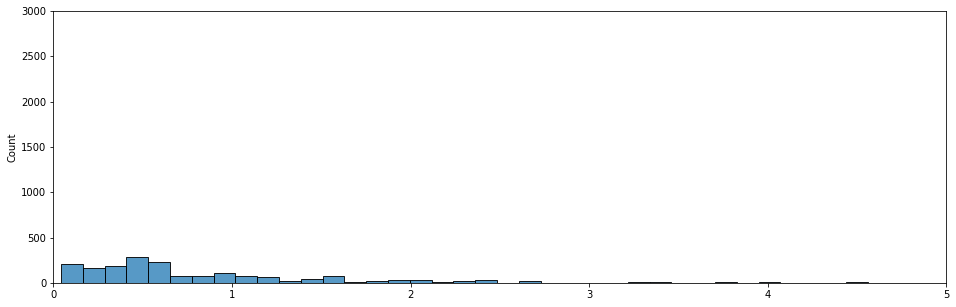

In [47]:
plt.figure(figsize=(16, 5))
sns.histplot(preds[np.where(y_val == 3.)[0]])
plt.xlim([0, 5])
plt.ylim([0, 3000])

In [36]:
[len(el) for el in vals]

[151408, 124760, 166816, 182901, 233782]

<AxesSubplot:xlabel='shop_id', ylabel='Count'>

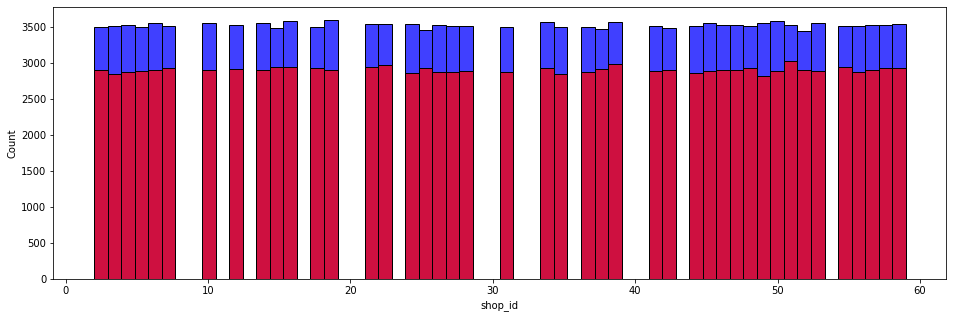

In [35]:
plt.figure(figsize=(16, 5))
sns.histplot(vals[0].shop_id, color='b', bins=60)
sns.histplot(vals[1].shop_id, color='r', bins=60)
sns.histplot(vals[3].shop_id, color='y', bins=60)

In [28]:
model.best_iteration_

23

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from catboost import CatBoostRegressor


def make_test_pred_and_save():
    test = pd.read_csv('test.csv')
    test["date_block_num"] = 34
    test.drop('ID', axis=1, inplace=True)
    all_data = fill_with_0_target(downcast_dtypes(pd.read_csv('sales_train.csv')))
    all_data = pd.concat([all_data, test])
    all_data['target'] = all_data['target'].clip(0., 20.)
    all_data = add_item_last_stat(all_data)
    all_data = add_shop_last_stat(all_data)
    all_data['is_new_item'] = all_data.prev_item_sales.isna().astype(int)
    print('feats are constructed')
    train_exp_on_prev = all_data.fillna(0.).loc[(all_data['date_block_num'] > 0) & (all_data['date_block_num'] < 34)]
    test = all_data.fillna(0.).loc[all_data['date_block_num'] == 34]
    extra_items = set(test.item_id) - set(train_exp_on_prev.item_id)
    extra_idces = test.loc[test['item_id'].isin(extra_items)].index - test.index.min()
    X_test = np.array(test.drop(['date_block_num', 'target', 'item_id', 'shop_id'], axis=1))
    for train, val in get_train_val(train_exp_on_prev, *get_split_points(train_exp_on_prev)):
        pass
    X_train = np.array(train.drop(['date_block_num', 'target', 'item_id', 'shop_id'], axis=1))
    X_val = np.array(val.drop(['date_block_num', 'target', 'item_id', 'shop_id'], axis=1))
    y_train, y_val = np.array(train['target']), np.array(val['target'])
    model = CatBoostRegressor()
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=5, silent=True)

    preds = model.predict(X_test)
    preds[extra_idces] += 0.3
    test_pred = pd.read_csv('test.csv')
    submission = test_pred.loc[:,['ID']]
    submission['item_cnt_month'] = preds
    submission.to_csv('submission.csv', index=False)
    
    
    


# print(mse(model.predict(X_val), np.array(y_val), squared=False))

In [18]:
test = pd.read_csv('test.csv')
extra_items = set(test.item_id) - set(all_data.item_id)
extra_idces = test.loc[test['item_id'].isin(extra_items)].index - test.index.min()
print(len(extra_idces) / len(test))

0.0711764705882353


In [ ]:
len(extra_items)

In [17]:
for train, val in get_train_val(train_exp_on_prev, *get_split_points(train_exp_on_prev)):
    extra_items = set(val.item_id) - set(train.item_id)
    extra_idces = val.loc[val['item_id'].isin(extra_items)].index - val.index.min()
    print(len(extra_idces) / len(val))

0.04792944785276074
0.03869998121360135
0.05520751761942052
0.05939036381514257
0.08812118972843155


In [19]:
new_items_share_in_test = 0.071

In [21]:
for train, val in get_train_val(train_exp_on_prev, *get_split_points(train_exp_on_prev)):
    extra_items = set(val.item_id) - set(train.item_id)
    extra_idces = val.loc[val['item_id'].isin(extra_items)].index - val.index.min()
    break

In [31]:
for train, val in get_train_val(train_exp_on_prev, *get_split_points(train_exp_on_prev)):
    extra_items = set(val.item_id) - set(train.item_id)
    extra_idces = val.loc[val['item_id'].isin(extra_items)].index - val.index.min()
    if len(extra_idces) / len(val) < 0.071:
        new_n_old_objects = int(len(extra_idces) / 0.071 - len(extra_idces))
        new_val = val.loc[~val['item_id'].isin(extra_items)]
        drop_indices = np.random.choice(new_val.index, len(new_val) - new_n_old_objects, replace=False)
        new_val = val.drop(drop_indices)
    else:
        n_old_objects = len(val.loc[~val['item_id'].isin(extra_items)])
        new_n_new_objects = int(n_old_objects * 0.071 / (1 - 0.071 ))
        new_val = val.loc[val['item_id'].isin(extra_items)]
        drop_indices = np.random.choice(new_val.index, len(new_val) - new_n_new_objects, replace=False)
        new_val = val.drop(drop_indices)
    print(len(new_val.loc[new_val['item_id'].isin(extra_items)]) / len(new_val))

0.07100021134946634
0.07100032061558191
0.071000383656244
0.07100015855572141
0.07099776715059329


In [28]:
len(new_val.loc[new_val['item_id'].isin(extra_items)]) / len(new_val)

0.07100021134946634

In [30]:
new_n_new_objects

256374